# 피규어 출력

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from statsmodels.graphics.mosaicplot import mosaic

plt.style.use("ggplot")


In [3]:
#분석 관련
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from statsmodels.formula.api import ols
from factor_analyzer import FactorAnalyzer

In [4]:
#기초 전처리 데이터 출력
x_train = pd.read_excel("../data/cip_preprocess.xlsx")
y_train = pd.read_excel("../data/cip_preprocess_y.xlsx")


In [5]:
sensibility = x_train[y_train['CIP']==0] # 
tolerance = x_train[y_train['CIP']==1] #

In [6]:
tolerance['iDBP']

0      65
5      81
7      84
10     64
11     50
       ..
366    78
369    69
370    62
371    62
372    62
Name: iDBP, Length: 188, dtype: int64

In [7]:
sensibility['iDBP']

1      59
2      95
3      77
4      79
6      40
       ..
360    47
362    56
367    64
368    82
373    63
Name: iDBP, Length: 186, dtype: int64

In [8]:
ks_res=kstest(tolerance['iDBP'], sensibility['iDBP'])
ks_res

KstestResult(statistic=0.15122397620681766, pvalue=0.023705872959253194)

iminus 지점:  74 0.1512239762068176


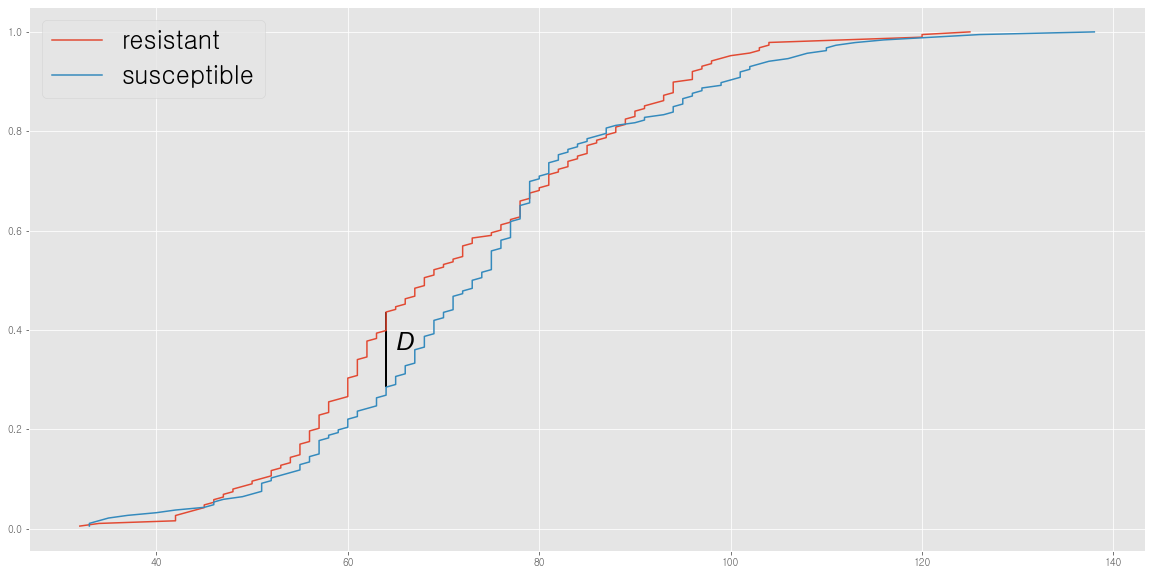

In [17]:

# fit an empirical cdf to a bimodal dataset
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(20,10))

# fit a cdf
ecdf = ECDF(tolerance['iDBP'])
ecdf2 = ECDF(sensibility['iDBP'])
# plot the cdf
gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",iminus,gaps[iminus])

# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.vlines([ecdf.x[1:][iminus]], ecdf2(ecdf.x[1:][iminus]),ecdf(ecdf.x[1:][iminus]), color='k', linestyle='solid', lw=2)
plt.text(ecdf.x[1:][iminus]+1,(ecdf2(ecdf.x[1:][iminus])+ecdf(ecdf.x[1:][iminus]))/2 , 
         'D',
         fontdict={'family': 'Arial',
          'color':  'black',
          'style': 'italic',
          'size': 25}
        )
plt.rc('legend', fontsize=25)
plt.legend()

plt.savefig('./iDBP.png')
plt.show()

In [42]:
sensibility['pH']

1      7.455
2      7.433
3      7.541
4      7.526
6      7.430
       ...  
360    7.343
362    7.472
367    7.445
368    7.445
373    7.411
Name: pH, Length: 186, dtype: float64

In [44]:
ks_res=kstest(tolerance['pO2'], sensibility['pO2'])
ks_res

KstestResult(statistic=0.1206817661862274, pvalue=0.1168686835528796)

In [45]:
ks_res=kstest(tolerance['pH'], sensibility['pH'])
ks_res

KstestResult(statistic=0.09408602150537634, pvalue=0.3467087914829531)

iminus 지점:  51 0.12068176618622736


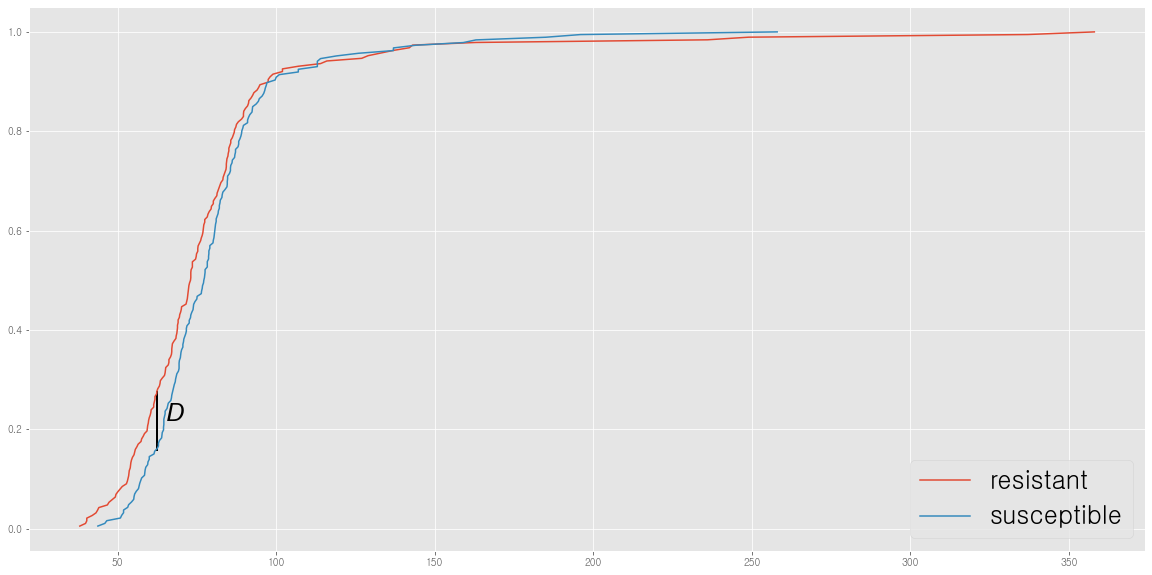

In [18]:

# fit an empirical cdf to a bimodal dataset
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(20,10))

# generate a sample
sample = hstack((tolerance['pO2'], sensibility['pO2']))
# fit a cdf
ecdf = ECDF(tolerance['pO2'])
ecdf2 = ECDF(sensibility['pO2'])

gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",iminus,gaps[iminus])

# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.vlines([ecdf.x[1:][iminus]], ecdf2(ecdf.x[1:][iminus]),ecdf(ecdf.x[1:][iminus]), color='k', linestyle='solid', lw=2)
plt.text(ecdf.x[1:][iminus]+3,(ecdf2(ecdf.x[1:][iminus])+ecdf(ecdf.x[1:][iminus]))/2 , 
         'D',
         fontdict={'family': 'Arial',
          'color':  'black',
          'style': 'italic',
          'size': 25}
        )
plt.rc('legend', fontsize=25)
plt.legend()
plt.savefig('./pO2.png')
plt.show()

In [118]:
ecdf(iminus)

0.07978723404255318

In [112]:
gaps=np.abs(ecdf2(ecdf.x[1:]) - ecdf(ecdf.x[1:]))
iminus= np.argmax(gaps)

print("iminus 지점: ",ecdf.x[1:][iminus],gaps[iminus])

iminus 지점:  62.4 0.12068176618622736


In [114]:
gaps[iminus]

0.12068176618622736

In [58]:
ecd=ECDF(sample)
ecd.y

array([0.        , 0.0026738 , 0.00534759, 0.00802139, 0.01069519,
       0.01336898, 0.01604278, 0.01871658, 0.02139037, 0.02406417,
       0.02673797, 0.02941176, 0.03208556, 0.03475936, 0.03743316,
       0.04010695, 0.04278075, 0.04545455, 0.04812834, 0.05080214,
       0.05347594, 0.05614973, 0.05882353, 0.06149733, 0.06417112,
       0.06684492, 0.06951872, 0.07219251, 0.07486631, 0.07754011,
       0.0802139 , 0.0828877 , 0.0855615 , 0.08823529, 0.09090909,
       0.09358289, 0.09625668, 0.09893048, 0.10160428, 0.10427807,
       0.10695187, 0.10962567, 0.11229947, 0.11497326, 0.11764706,
       0.12032086, 0.12299465, 0.12566845, 0.12834225, 0.13101604,
       0.13368984, 0.13636364, 0.13903743, 0.14171123, 0.14438503,
       0.14705882, 0.14973262, 0.15240642, 0.15508021, 0.15775401,
       0.16042781, 0.1631016 , 0.1657754 , 0.1684492 , 0.17112299,
       0.17379679, 0.17647059, 0.17914439, 0.18181818, 0.18449198,
       0.18716578, 0.18983957, 0.19251337, 0.19518717, 0.19786

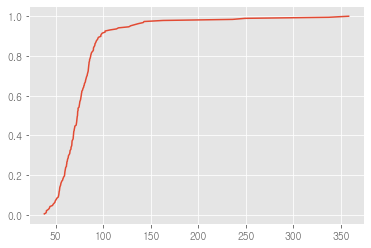

In [49]:
ecdf = ECDF(tolerance['pO2'])
ecdf2 = ECDF(sensibility['pO2'])
# plot the cdf
plt.plot(ecdf.x, ecdf.y,label='resistant')

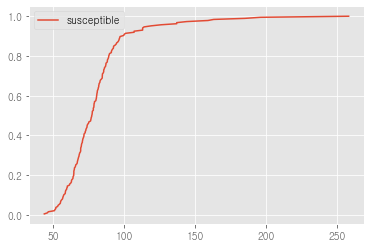

In [50]:
plt.plot(ecdf2.x, ecdf2.y,label='susceptible')
plt.legend()

# p-value

In [ ]:
plt.plot()

# shap